# Practice notebook for multivariate analysis using NHANES data

This notebook will give you the opportunity to perform some multivariate analyses on your own using the NHANES study data.  These analyses are similar to what was done in the week 3 NHANES case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

df = pd.read_csv("nhanes_2015_2016.csv")
df.columns

Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')

## Question 1

Make a scatterplot showing the relationship between the first and second measurements of diastolic blood pressure ([BPXDI1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI1) and [BPXDI2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/BPX_I.htm#BPXDI2)).  Also obtain the 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures.

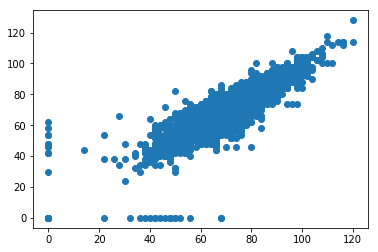

In [2]:
# enter your code here
plt.scatter(x = 'BPXDI1',
            y = 'BPXDI2',
            data = df)


In [3]:
df[['BPXSY1', 'BPXSY2', 'BPXDI1', 'BPXDI2']].corr(method = 'pearson')

,BPXSY1,BPXSY2,BPXDI1,BPXDI2
BPXSY1,1.000000,0.962287,0.316531,0.277681
BPXSY2,0.962287,1.000000,0.329843,0.303847
BPXDI1,0.316531,0.329843,1.000000,0.884722
BPXDI2,0.277681,0.303847,0.884722,1.000000


__Q1a.__ How does the correlation between repeated measurements of diastolic blood pressure relate to the correlation between repeated measurements of systolic blood pressure?

__Q2a.__ Are the second systolic and second diastolic blood pressure measure more correlated or less correlated than the first systolic and first diastolic blood pressure measure?

## Question 2

Construct a grid of scatterplots between the first systolic and the first diastolic blood pressure measurement.  Stratify the plots by gender (rows) and by race/ethnicity groups (columns).

In [4]:
df["RIAGENDRx"] = df.RIAGENDR.map({1: 'Male',
                                   2: 'Female'})

df["RIDRETH1x"] = df.RIDRETH1.map({1: 'Mexican American',
                                   2: 'Other Hispanic',
                                   3: 'Non-Hispanic White',
                                   4: 'Non-Hispanic Black',
                                   5: 'Other Race - Including Multi-Racial'})


/opt/conda/lib/python3.6/site-packages/matplotlib/tight_layout.py:198: UserWarning: tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('tight_layout cannot make axes width small enough '


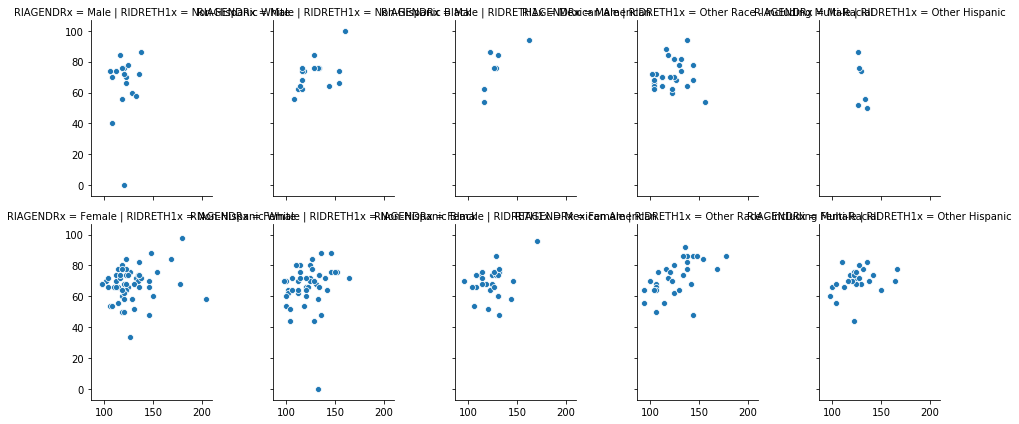

In [5]:
# insert your code here

#create the grid
g = sns.FacetGrid(data = df, row = 'RIAGENDRx', col = 'RIDRETH1x')
#then create the viz
g.map_dataframe(sns.scatterplot, x = 'BPXSY1', y = 'BPXDI1')
# g.add_legend()
# g.set_titles('{row_name}, {col_name}')
plt.tight_layout() #with tight layout, the subtitles still overflowed
plt.show()


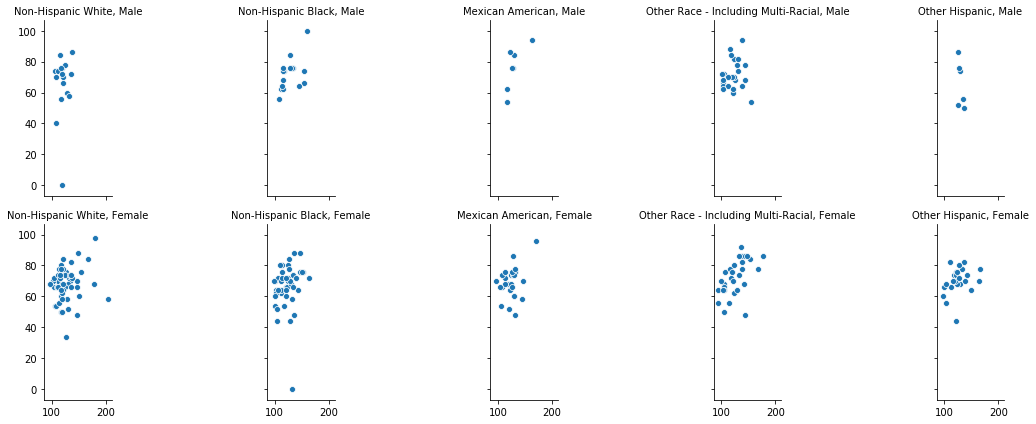

In [6]:
#Fix overflowing subtitles using 'set_titles' to set shorter title labels of our own

#create the grid
g = sns.FacetGrid(data = df, row = 'RIAGENDRx', col = 'RIDRETH1x')
#then create the viz
g.map_dataframe(sns.scatterplot, x = 'BPXSY1', y = 'BPXDI1')
# g.add_legend()
g.set_titles('{col_name}, {row_name}')
# plt.tight_layout() #with tight layout, the subtitles still overflowed
plt.show()


__Q3a.__ Comment on the extent to which these two blood pressure variables are correlated to different degrees in different demographic subgroups.

## Question 3

Use "violin plots" to compare the distributions of ages within groups defined by gender and educational attainment.

In [7]:
df["DMDEDUC2x"] = df.DMDEDUC2.map({1: 'Less than 9th grade',
                                   2: '9-11 grade',
                                   3: 'HS/GED',
                                   4: 'Some college/AA degree',
                                   5: 'College',
                                   7: 'Refused',
                                   9: 'Dont know'})


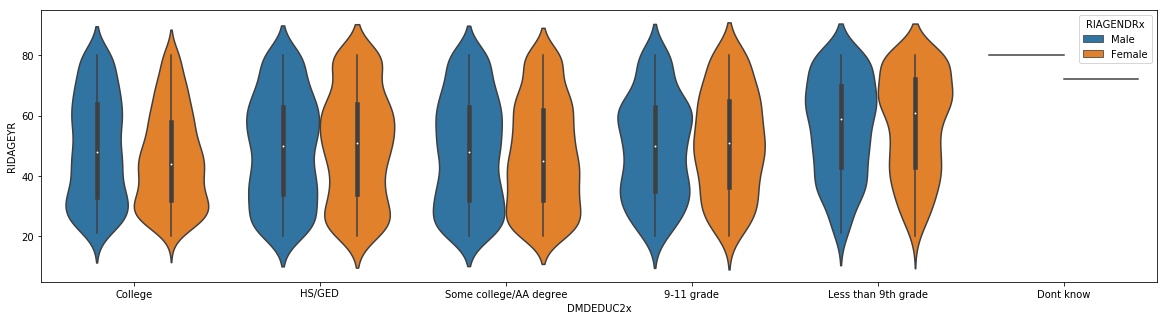

In [8]:
# insert your code here
# g2 = sns.FacetGrid(col = 'DMDEDUC2x', data= df)
# g2.map(sns.violinplot, x = 'RIAGENDRx', y = 'RIDAGEYR', order = 'RIAGENDRx')
plt.figure(figsize=(20,5))
sns.violinplot(x = 'DMDEDUC2x', y = 'RIDAGEYR', hue = 'RIAGENDRx', data = df)
plt.show()


__Q4a.__ Comment on any evident differences among the age distributions in the different demographic groups.

## Question 4

Use violin plots to compare the distributions of BMI within a series of 10-year age bands.  Also stratify these plots by gender.

In [9]:
# df['RIDAGEYRx'] = pd.cut(df.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
# print('Number of NULL age groups :', df.RIDAGEYRx.isnull().sum())

# Number of NULL age groups : 133


In [10]:
# df['RIDAGEYRx'] = df['RIDAGEYRx'].cat.add_categories('Missing')
# df['RIDAGEYRx'] = df['RIDAGEYRx'].fillna('Missing')
# print('Number of NULL age groups :', df.RIDAGEYRx.isnull().sum())

# Number of NULL age groups : 0


In [11]:
df['RIDAGEYRx'] = pd.cut(df.RIDAGEYR, [0, 10, 20, 30, 40, 50, 60, 70, 80])
print('Number of NULL age groups :', df.RIDAGEYRx.isnull().sum())


Number of NULL age groups : 0


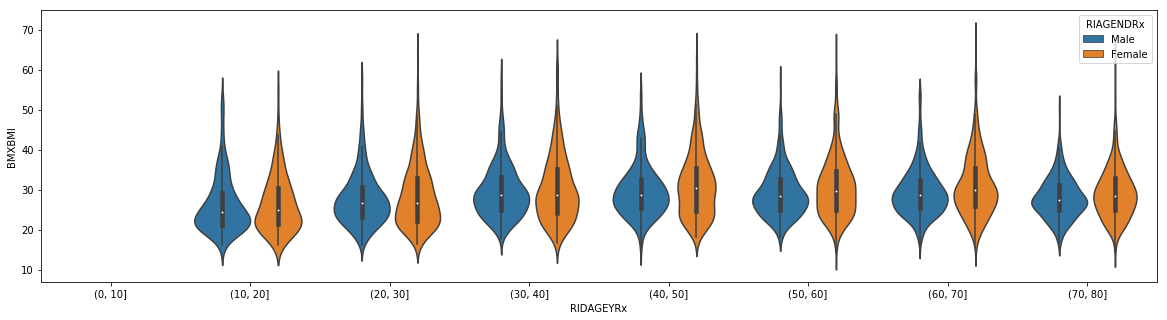

In [12]:
# insert your code here
plt.figure(figsize = (20, 5))
sns.violinplot(x = 'RIDAGEYRx', y = 'BMXBMI', hue = 'RIAGENDRx', data = df)
plt.show()


__Q5a.__ Comment on the trends in BMI across the demographic groups.

## Question 5

Construct a frequency table for the joint distribution of ethnicity groups ([RIDRETH1](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#RIDRETH1)) and health-insurance status ([HIQ210](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/HIQ_I.htm#HIQ210)).  Normalize the results so that the values within each ethnic group are proportions that sum to 1.

In [14]:
df["HIQ210x"] = df.HIQ210.map({1: 'Yes',
                               2: 'No',
                               7: 'Refused',
                               9: 'Dont know',
                               '.': 'Missing'})

print('Number of NULL insurance groups :', df.HIQ210x.isnull().sum())


Number of NULL insurance groups : 1003


In [16]:
df["HIQ210x"] = df["HIQ210x"].fillna('Missing')


In [17]:
print('Number of NULL insurance groups :', df.HIQ210x.isnull().sum())


Number of NULL insurance groups : 0


In [19]:
# insert your code here
#axis=0 => within each col => SUM to 1
df.groupby(['HIQ210x', 'RIDRETH1x']).size().unstack().apply(lambda x: x/x.sum(), axis=0)


RIDRETH1x,Mexican American,Non-Hispanic Black,Non-Hispanic White,Other Hispanic,Other Race - Including Multi-Racial
HIQ210x,,,,,
Dont know,0.002947,0.000815,0.001088,NaN,0.002220
Missing,0.337917,0.152404,0.103861,0.233333,0.117647
No,0.567780,0.754686,0.834693,0.668000,0.807991
Yes,0.091356,0.092095,0.060359,0.098667,0.072142


__Q6a.__ Which ethnic group has the highest rate of being uninsured in the past year?